In [2]:
import random
from time import sleep

import gym
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
# Create our testing environment. This will act as the MDP for our algorithm.
env = gym.make("Taxi-v3")

In [66]:
num_observations = env.observation_space.n  # The number of possible states of the environment.
num_actions = env.action_space.n  # The number of available actions in each state.
print('Possible observations:', num_observations)
print('Available actions:', num_actions)

Possible observations: 500
Available actions: 6


In [5]:
alpha = 0.1  # The learning rate.
gamma = 0.5  # The discount factor.
epsilon = 0.1  # The exploration probability.

In [81]:
# This is the main loop.
num_train_episodes = 1000  # Modify to tune for convergence
render = True  # Set to False to speed up training
returns = []
# This creates our Q-table: A two-dimensional array of all zeros.
q_table = np.zeros([num_observations, num_actions])
print('Shape of the Q-table:', q_table.shape)

def best_action(observation):
    q_value, action = float("-inf"), -1

    actions = q_table[observation]

    for a, q in enumerate(actions):
        if q > q_value:
            q_value = q
            action = a

    # select best action with epsilon greed policy
    best_probability = 1 - epsilon
    other = epsilon / (num_actions - 1)
    
    probabilities = []
    
    for a in range(num_actions):
        if a == action:
            p = best_probability
        else:
            p = other
        probabilities.append(p)

    action = np.random.choice(list(range(num_actions)), p=probabilities)

    # return the action and its current q_value for the given state (observation)
    return action, actions[action]

for episode in range(1, num_train_episodes):
    # By resetting the environment you also get the initial observation or "state".
    observation = env.reset()

    # Repeat until the environment is done.
    done = False
    episode_return = 0
    
    # ME: select best action for initial state with epsilon-greedy
    action, q_value = best_action(observation) 
    
    while not done:
        # Perform the chosen action in the environment to get reward values and the next observation.
        next_observation, reward, done, _ = env.step(action)
        
        # Update your Q-table based on the information you gathered!
        next_action, next_q_value = best_action(next_observation) 
        # TODO: This is where the magic (learning) happens.
        
        # ME: calculate the td_error depending on the maximum q_value for the next state
        td_error = reward + (gamma * np.max(q_table[next_observation])) - q_value
        # ME: update the q_table for the current state and action
        q_table[observation, action] = q_value + (alpha * td_error)
        
        # Step the observation
        observation = next_observation
        # ME: update action
        action = next_action
        # ME: update q_value
        q_value = next_q_value
                
        # For performance reasons, only display every 200th episode.
        episode_return += reward
        if render and episode % 200 == 0:
            clear_output(wait=True)
            env.render()
            print("Episode: ", episode)
            print("Reward: ", reward)
            print("Return so far: ", episode_return)
            # Wait a little bit. We don't want to go too fast.
            sleep(0.1)
    returns.append(episode_return)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Episode:  800
Reward:  20
Return so far:  0


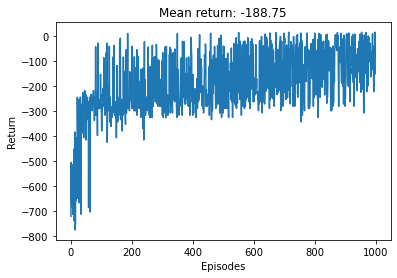

In [82]:
mean_return = round(np.mean(returns), 2)
plt.plot(returns)
plt.xlabel("Episodes")
plt.ylabel("Return")
plt.title("Mean return: " +  str(mean_return))
plt.show()

In [83]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.94151475, -1.94255943, -1.94296609, -1.94031737, -1.94005525,
        -6.07686418],
       [-1.63707156, -1.62386111, -1.58152823, -1.57855153, -1.37595524,
        -4.97776041],
       ...,
       [-1.20496161, -1.17088099, -1.17234391, -1.18874011, -2.81352975,
        -2.74878716],
       [-1.79676005, -1.79567739, -1.79378804, -1.78771489, -1.95008997,
        -5.55104   ],
       [-0.195     , -0.28075   , -0.195     ,  0.97932601, -1.005     ,
        -1.905     ]])